<a href="https://colab.research.google.com/github/Nianrilo/ClaseMachineLearning/blob/main/HeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Librerías**

In [ ]:
#Importamos las librerias
import math
import sys
import time
import glob
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier

**Preprocesamiento y limpieza de los datos**

In [ ]:
heart = pd.read_csv('heart.csv')
#Convertimos las variables categóricas a numéricas
enc = OrdinalEncoder()
enc.fit(heart[["Sex","ChestPainType","RestingECG","ExerciseAngina","ST_Slope"]])
heart[["Sex","ChestPainType"
    ,"RestingECG","ExerciseAngina","ST_Slope"]]= enc.transform(heart[["Sex","ChestPainType","RestingECG","ExerciseAngina","ST_Slope"]])
caracteristicasLimpias=pd.DataFrame(heart)
caracteristicasLimpias.to_csv("caracteristicasLimpias.csv")


**Segmentación y normalización de los datos**

In [ ]:
x = heart.iloc[:,:-1].values
y = heart.iloc[:,-1].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.3, random_state = 21)

scalerXTr = StandardScaler()
scalerXTr.fit(x_train)
x_train = scalerXTr.transform(x_train)

scalerXTe = StandardScaler()
scalerXTe.fit(x_test)
x_test = scalerXTe.transform(x_test)

**Descomposición en componentes principales**

In [ ]:
pca = PCA(n_components=11)
pca.fit(x_train)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_[0:10]))

[0.24760657 0.1347759  0.10415768 0.09568606 0.08153934 0.07584057
 0.07204582 0.05374304 0.050973   0.0466359  0.03699611]
0.9630038874445384


Con el fin de reducir las dimensiones sin perder datos reelevantes se tomará la nueva dimensión como 10, dado que esta nos da una varianza de 0.963 lo cual está debajo del criterio del 97%, sin embargo es bastante cercano a este

In [ ]:
pca = PCA(n_components=10)
pca.fit(x_train)
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)
print(len(x_train[0]))

10


Se elije usar el método de KNN dado que es el método visto en clase que mejores resultados da usando la configuración de datos y PCA en la aplicacion **Classification learner** de Matlab. Con el cual adicionalmente obtenemos que el mejor K es 10 con métrica euclidiana.

[0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 0 1
 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 1 1 0
 0 0 1 1 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0
 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0
 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0
 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1
 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1
 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 1]


<function matplotlib.pyplot.show>

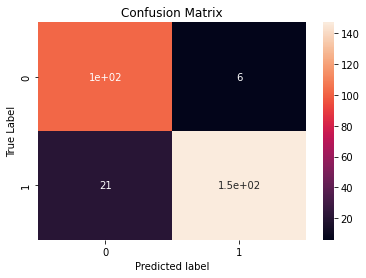

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=9, p=2,weights="distance")
KNN.fit(x_train, y_train)
y_pred = KNN.predict(x_test)
print(y_pred)
KNNConfMat = confusion_matrix(y_test,y_pred)
sns.heatmap(KNNConfMat,annot=True)
plt.xlabel("Predicted label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show

In [ ]:
print("Accuracy")
print(accuracy_score(y_test,y_pred))
print("MCC")
print(matthews_corrcoef(y_test, y_pred))
print("F1_Score")
print(f1_score(y_test, y_pred, average='micro'))
print("AUC_ROC_Score")
print(roc_auc_score(y_test, y_pred))

Accuracy
0.9021739130434783
MCC
0.804614329440031
F1_Score
0.9021739130434784
AUC_ROC_Score
0.9097222222222222
